In [3]:
# 1. Install Required Libraries
!pip install -q langchain langchain-community openai transformers faiss-cpu matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.3 MB/s eta 0:00:00


In [4]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.schema import Document
from langchain.text_splitter import CharacterTextSplitter
from langchain.chains import RetrievalQA
from langchain.llms.fake import FakeListLLM
import pandas as pd

In [5]:
# Define In-Memory Context
mcp_content = """
Model Context Protocol (MCP) is a specification that helps structure prompt context
for large language models. MCP organizes inputs into sections such as task description,
constraints, tools, and examples to enhance LLM reliability and task alignment.
"""

In [6]:
#  Convert to LangChain Document
raw_doc = Document(page_content=mcp_content)
splitter = CharacterTextSplitter(chunk_size=150, chunk_overlap=10)
docs = splitter.split_documents([raw_doc])

In [7]:
# Embed and Store with FAISS
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
faiss_store = FAISS.from_documents(docs, embeddings)


<ipython-input-7-35fa76a7f658>:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.war

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
# Dummy LLM Setup (Replace with OpenAI/HuggingFace API for real tests)
fake_llm = FakeListLLM(responses=[
    "MCP structures prompts with task, constraints, tools, and examples."
])

In [10]:
# Define Retrieval-Based QA System
retriever = faiss_store.as_retriever()
qa_chain = RetrievalQA.from_chain_type(llm=fake_llm, retriever=retriever)

In [11]:
# Ask MCP-related Question
query = "What is Model Context Protocol and how does it improve prompts?"
response = qa_chain.run(query)
print(f"\n🧠 Response: {response}\n")


🧠 Response: MCP structures prompts with task, constraints, tools, and examples.



<ipython-input-11-ee21952bc2c0>:3: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = qa_chain.run(query)


<ipython-input-12-c6f4dcc98aa4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=section_labels, y=section_lengths, palette="coolwarm")
<ipython-input-12-c6f4dcc98aa4>:10: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


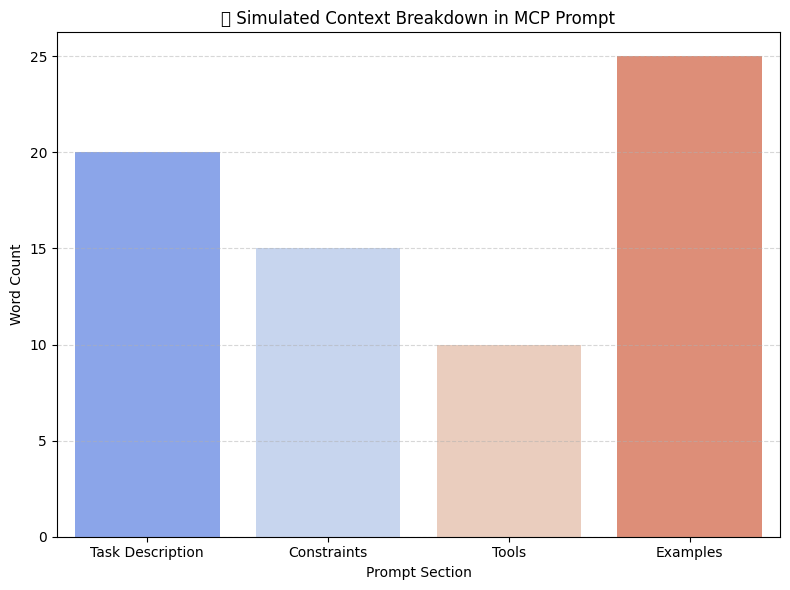

In [12]:
# Visualization of Response Structure
section_labels = ["Task Description", "Constraints", "Tools", "Examples"]
section_lengths = [20, 15, 10, 25]  # Simulated values

plt.figure(figsize=(8, 6))
sns.barplot(x=section_labels, y=section_lengths, palette="coolwarm")
plt.title("🧱 Simulated Context Breakdown in MCP Prompt")
plt.ylabel("Word Count")
plt.xlabel("Prompt Section")
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()
